#### **neural network optimization**

##### try to optimize the weights of the neural network by random pick the best weights

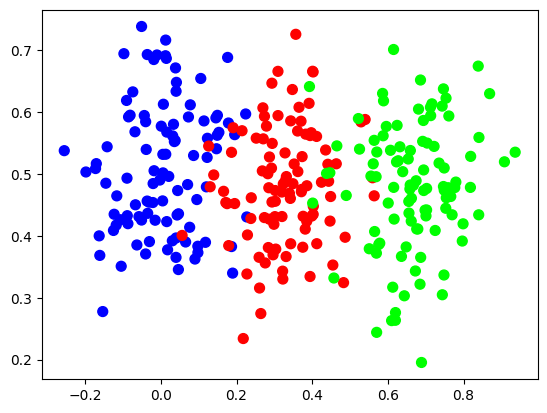

In [1]:
from re import X
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import vertical_data

import numpy as np

nnfs.init()


X ,y = vertical_data(samples=100 , classes=3)

plt.scatter(X[:,0],X[:,1],c=y , s=50 , cmap='brg')

plt.show()

In [4]:
class Layer_Dense:
    # layer initialization 
    def __init__(self,n_inputs,n_neurons):
        # initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs,n_neurons)
        # initialize biases 0
        self.biases = np.zeros([1,n_neurons])

    def forward(self,inputs):
        # forward pass
        self.outputs = np.dot(inputs,self.weights) + self.biases

## Activation function class

class Activation_ReLU:
    def forward(self,inputs):
        self.outputs = np.maximum(0,inputs)


# softmax class
class Activation_Softmax:

    def forward(self, inputs):
        # get unnormalized probability
        exp_value = np.exp(inputs - np.max(inputs , axis = 1 , keepdims = True))

# get normalized probability
        normalized_prob = exp_value / np.sum(exp_value , axis = 1 , keepdims = True)

        self.output = normalized_prob



# final mean loss 
class Loss:
    def calculate(self , output ,y):
        sample_losses = self.forward(output , y)

        data_loss = np.mean(sample_losses)
        return data_loss
    



class Loss_CategoricalCrossentropy(Loss):
    def forward(self , y_pred , y_true):
        
        samples = len(y_pred)
        # clip the data to prevent divison by zero 
        # clip the both sides to not drag mean towards any vales 
        y_pred_clipped = np.clip(y_pred , 1e-7 , 1.0 - 1e-7)

        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples) , y_true]

        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped * y_true , axis = 1)

        # losses 
        negative_log_likelihood = -np.log(correct_confidences)

        return negative_log_likelihood

In [ ]:
activation1 = Activation_ReLU()
activation2 = Activation_Softmax()


# create Dense layer with 2 inputs and 3 output values 

dense1 = Layer_Dense(2 , 3)

dense1.forward(X)

activation1.forward(dense1.outputs)

dense2 = Layer_Dense(3, 3)

dense2.forward(activation1.outputs)

activation2.forward(dense2.outputs)


lowest_loss = 1000
best_dense1_weights = dense1.weights.copy()
best_dense2_weights = dense2.weights.copy()
best_dense1_bias = dense1.biases.copy()
best_dense2_bias = dense2.biases.copy()


for iteration in range(10000):
    dense1.weights = 0.05 * np.random.randn(2, 3)
    dense1.biases = 0.05 * np.random.randn(1 ,3)
    dense2.weights = 0.05 * np.random.randn(3, 3)
    dense2.biases = 0.05 * np.random.randn(1 ,3)

    dense1.forward(X)
    activation1.forward(dense1.outputs)
    dense2.forward(activation1.outputs)
    activation2.forward(dense2.outputs)
    
    Loss_CategoricalCrossentropy_values = Loss_CategoricalCrossentropy()
    Loss_values = Loss_CategoricalCrossentropy_values.calculate(activation2.output, y)
    
    if Loss_values < lowest_loss:
        lowest_loss = Loss_values
        best_dense1_weights = dense1.weights.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense1_bias = dense1.biases.copy()
        best_dense2_bias = dense2.biases.copy()
        
        print("loss " , Loss_values)
        # print("dense1 weights " , dense1.weights)
        # print("dense2 weights " , dense2.weights)
        # print("dense1 bias " , dense1.biases)
        # print("dense2 bias " , dense2.biases)



loss  1.0990233
loss  1.0987952
loss  1.0986116
loss  1.0985945
loss  1.0980173
loss  1.0975838
loss  1.097566
loss  1.0974228
loss  1.0967692
loss  1.0967321
loss  1.095456
loss  1.0949936
